In [ ]:
from tensorflow import keras
from keras.layers import Input, Dense, Conv2D, MaxPooling2D, Flatten
from tensorflow.keras import  datasets
from matplotlib import pyplot as plt


In [ ]:
(x_train, y_train), (x_test, y_test) = datasets.mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


2


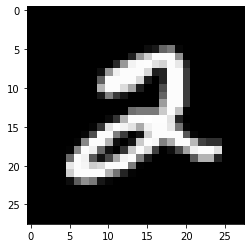

In [ ]:
plt.imshow(x_train[5],cmap="gray")
print(y_train[5])

In [ ]:
#Convert the labels into 0 and 1 codes.
num_classes = 10   #form 0 to 9
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)
print(y_train[0])

[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


In [ ]:
#Normalize image pixel values.
x_train = x_train/255
x_test = x_test/255

In [ ]:
model=keras.Sequential() #Create a network sequence.


model.add(Input(shape=(28,28,1)))   #28*28*1

model.add(Conv2D(filters=6,kernel_size = 5,strides = (1,1), padding = 'same',activation = 'relu'))   #28*28*6 #param=156
model.add(keras.layers.AvgPool2D(pool_size=(2,2), strides = (2,2), padding = 'valid'))   #14*14*6 #param=0

model.add(Conv2D(filters=6,kernel_size = 5,strides = (1,1), padding = 'same',activation = 'relu'))   #14*14*6 #param=906
model.add(keras.layers.AvgPool2D(pool_size=(2,2), strides = (2,2), padding = 'valid'))   #7*7*6 #param=0


model.add(Conv2D(filters=16,kernel_size = 3,strides = (1,1), padding = 'same',activation = 'relu'))  #7*7*6 #param=880
model.add(keras.layers.AvgPool2D(pool_size=(2,2), strides = (2,2), padding = 'valid'))  #3*3*16 #param=0







model.add(Flatten())  #instead of 784 we got 144   #3*3*16=144 features
model.add(Dense(84,activation = 'relu'))  #144*84+84=12180

model.add(Dense(10,activation = 'softmax'))  #84*10+10=850 

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 6)         156       
                                                                 
 average_pooling2d (AverageP  (None, 14, 14, 6)        0         
 ooling2D)                                                       
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 6)         906       
                                                                 
 average_pooling2d_1 (Averag  (None, 7, 7, 6)          0         
 ePooling2D)                                                     
                                                                 
 conv2d_2 (Conv2D)           (None, 7, 7, 16)          880       
                                                                 
 average_pooling2d_2 (Averag  (None, 3, 3, 16)         0

In [ ]:
model.compile(optimizer='Adam',loss="categorical_crossentropy",metrics=['accuracy']) 

results= model.fit(x_train,y_train,epochs=20,batch_size=128,validation_data=(x_test, y_test))



Epoch 1/20
469/469 [==============================] - 14s 9ms/step - loss: 0.5731 - accuracy: 0.8214 - val_loss: 0.2285 - val_accuracy: 0.9301
Epoch 2/20
469/469 [==============================] - 4s 9ms/step - loss: 0.1871 - accuracy: 0.9440 - val_loss: 0.1451 - val_accuracy: 0.9517
Epoch 3/20
469/469 [==============================] - 4s 8ms/step - loss: 0.1382 - accuracy: 0.9584 - val_loss: 0.1100 - val_accuracy: 0.9645
Epoch 4/20
469/469 [==============================] - 4s 8ms/step - loss: 0.1162 - accuracy: 0.9651 - val_loss: 0.1004 - val_accuracy: 0.9684
Epoch 5/20
469/469 [==============================] - 4s 8ms/step - loss: 0.0989 - accuracy: 0.9697 - val_loss: 0.0810 - val_accuracy: 0.9739
Epoch 6/20
469/469 [==============================] - 4s 8ms/step - loss: 0.0867 - accuracy: 0.9735 - val_loss: 0.0716 - val_accuracy: 0.9763
Epoch 7/20
469/469 [==============================] - 4s 8ms/step - loss: 0.0771 - accuracy: 0.9761 - val_loss: 0.0734 - val_accuracy: 0.9748
Epoch

In [ ]:
score = model.evaluate(x_test, y_test)


313/313 [==============================] - 1s 4ms/step - loss: 0.0373 - accuracy: 0.9862


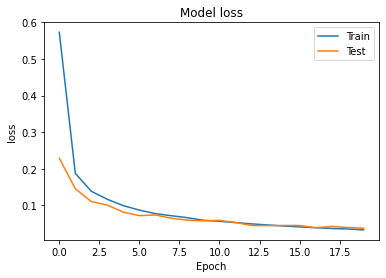

In [ ]:

plt.plot(results.history['loss'])
plt.plot(results.history['val_loss'])

plt.title('Model loss')
plt.ylabel('loss')

plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper right')

plt.show()

[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]


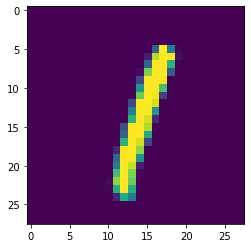

In [ ]:
plt.imshow(x_test[5])
print(y_test[5])